# Lec 32: GANs II

## Instructions

1. The GAN model covered in the lecture used fully connected layers in discriminator and generator. In this exercise, use at least two convolutional layers in discriminator and two transposed convolutions in the generator. Train the model on MNIST data and tweak the hyperparameters as needed to do training effectively.
2. Compare the results of your new GAN generator with the one in the lecture.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pytorch imports
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
# Import helper files
from helpers.helper_utils import set_all_seeds
from helpers.helper_data import get_dataloaders_mnist

## Settings

In [4]:
# Hyperparameters
NUM_EPOCHS = 100
BATCH_SIZE = 128
GENERATOR_LEARNING_RATE = 0.0002
DISCRIMINATOR_LEARNING_RATE = 0.0002

# Other settings
DEVICE = torch.device(f'cuda:0' if torch.cuda.is_available() else 'cpu')
RANDOM_SEED = 42
IMAGE_HEIGHT = 28
IMAGE_WIDTH = 28
IMAGE_CHANNELS = 1

set_all_seeds(RANDOM_SEED)
print(f'Device: {DEVICE}')

Device: cpu


In [5]:
# If running on Colab, uncomment this code

# from google.colab import drive
# drive.mount('/content/drive')

# SAVED_DATA_PATH = 'drive/MyDrive/saved_data/'

## MNIST Dataset

### Custom Transformations

In [6]:
custom_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

### Get Data Loaders

In [7]:
train_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    train_transforms=custom_transforms
)

# Verify dataset
for images, labels in train_loader:
    print(f'Image batch dimensions: {images.size()}')
    print(f'Image label dimensions: {labels.size()}')
    break

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


### View Training Images

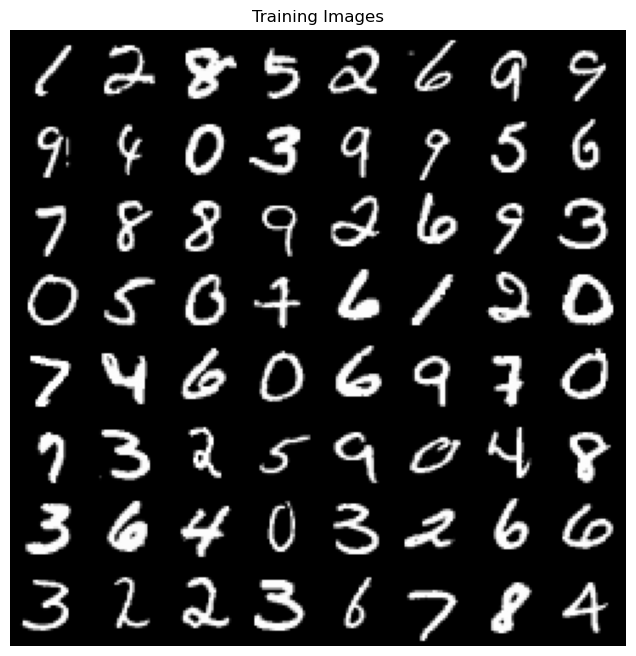

In [8]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Training Images')
plt.imshow(
    np.transpose(
        torchvision.utils.make_grid(
            images[:64],
            padding=2,
            normalize=True
        ),
        (1, 2, 0)
    )
)
plt.show()